       PassengerId  Survived  Pclass       Sex       Age     SibSp  Parch  \
count     5.000000  5.000000     5.0  5.000000   5.00000  5.000000    5.0   
mean      3.000000  0.600000     2.0  0.600000  31.20000  0.600000    0.0   
std       1.581139  0.547723     1.0  0.547723   6.83374  0.547723    0.0   
min       1.000000  0.000000     1.0  0.000000  22.00000  0.000000    0.0   
25%       2.000000  0.000000     1.0  0.000000  26.00000  0.000000    0.0   
50%       3.000000  1.000000     2.0  1.000000  35.00000  1.000000    0.0   
75%       4.000000  1.000000     3.0  1.000000  35.00000  1.000000    0.0   
max       5.000000  1.000000     3.0  1.000000  38.00000  1.000000    0.0   

            Fare  Embarked  
count   5.000000  5.000000  
mean   29.521660  0.200000  
std    30.510029  0.447214  
min     7.250000  0.000000  
25%     7.925000  0.000000  
50%     8.050000  0.000000  
75%    53.100000  0.000000  
max    71.283300  1.000000  
             PassengerId      Survived       

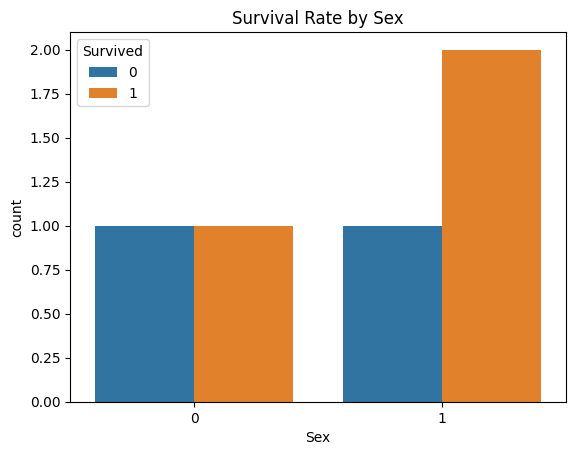

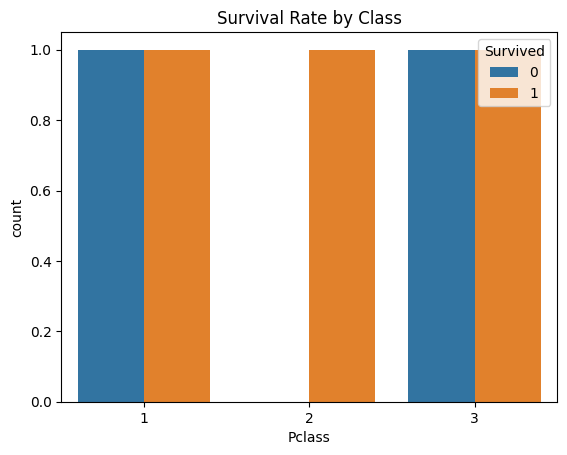

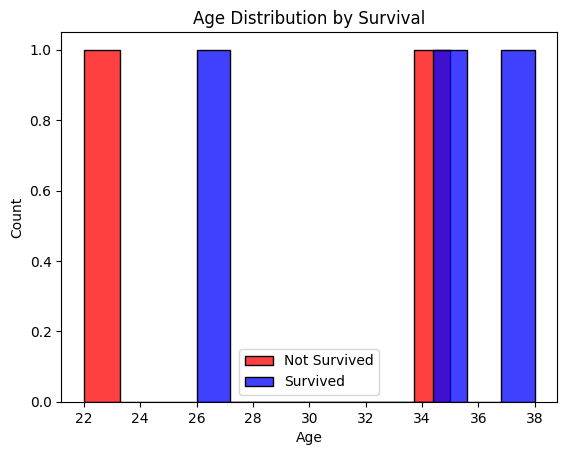

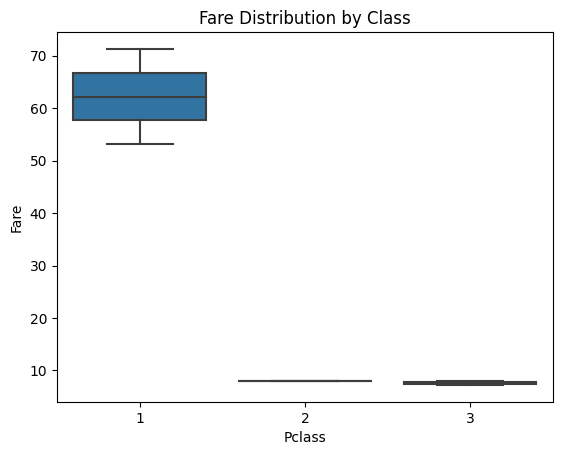

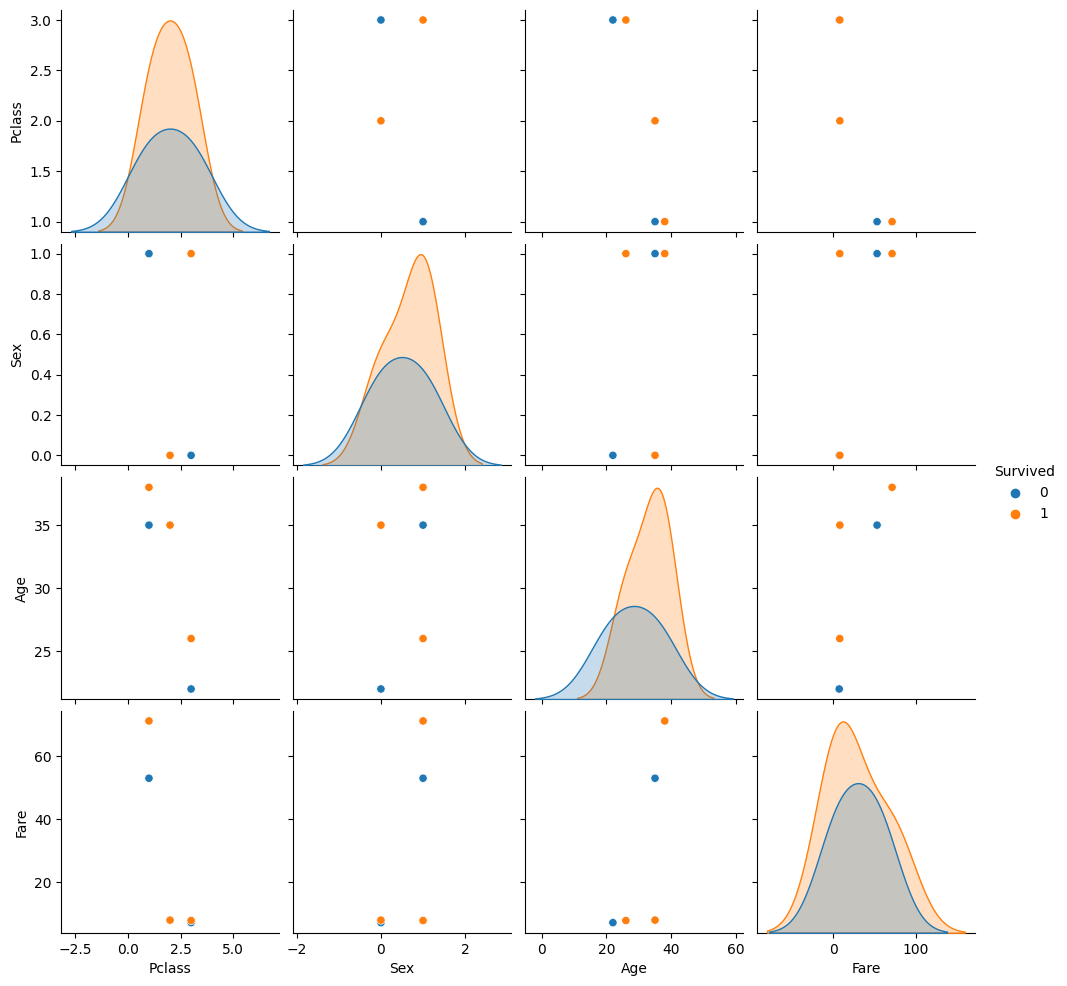

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a hypothetical dataset similar to the Titanic dataset
data = {
    'PassengerId': [1, 2, 3, 4, 5],
    'Survived': [0, 1, 1, 0, 1],
    'Pclass': [3, 1, 3, 1, 2],
    'Name': ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 
             'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'Allen, Mr. William Henry'],
    'Sex': ['male', 'female', 'female', 'female', 'male'],
    'Age': [22, 38, 26, 35, 35],
    'SibSp': [1, 1, 0, 1, 0],
    'Parch': [0, 0, 0, 0, 0],
    'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450'],
    'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05],
    'Cabin': [np.nan, 'C85', np.nan, 'C123', np.nan],
    'Embarked': ['S', 'C', 'S', 'S', 'S']
}

df = pd.DataFrame(data)

# Data Cleaning
## Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

## Convert categorical variables to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# EDA
## Summary statistics
print(df.describe())

## Correlation matrix
print(df.corr())

## Visualizations
### Survival rate by sex
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

### Survival rate by class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()

### Age distribution by survival
sns.histplot(df[df['Survived'] == 0]['Age'], bins=10, kde=False, color='red', label='Not Survived')
sns.histplot(df[df['Survived'] == 1]['Age'], bins=10, kde=False, color='blue', label='Survived')
plt.title('Age Distribution by Survival')
plt.legend()
plt.show()

### Fare distribution by class
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Class')
plt.show()

### Pairplot to explore relationships
sns.pairplot(df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived')
plt.show()
